# <div style="text-align:center">Event Feedback Analysis</div>

## Import Modules

In [1]:
import os
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn.cluster import KMeans, k_means
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
sns.set(rc={'figure.figsize':(8,6)})

## Import Event feedback dataset

In [2]:
df = pd.read_csv('./Dataset/Events_Raw_Data.csv')

In [3]:
df.head()

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


### Check for Null values

In [4]:
df.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?                          5
Are food areas, coffee areas, bars & toilets imp

In [5]:
df = df.dropna(subset=['Total_Household_Income'])

In [6]:
df.isnull().sum()

CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            0
How often you attend Entertaining events in a year?               0
Social_Media                                                      0
How many hours are you willing to travel to attend an event?      0
Do you enjoy adrenaline-rush activities?                          0
Are food areas, coffee areas, bars & toilets imp

### Indentifying Unique values

In [7]:
for col in df:
    unq_vals = np.unique(df[col])
    no_of_unq_vals = len(unq_vals)
    if no_of_unq_vals < 10:
        print(f"The number of values for feature {col}: {no_of_unq_vals} -- {unq_vals}")
    else:
        print(f"The number of values for feature {col}: {no_of_unq_vals}")

The number of values for feature CUSTOMER: 14778
The number of values for feature Age: 9 -- ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The number of values for feature Gender: 2 -- ['Female' 'Male']
The number of values for feature Postcode: 14674
The number of values for feature District: 225
The number of values for feature Constituency: 358
The number of values for feature latitude: 13242
The number of values for feature longitude: 13262
The number of values for feature Current_Status: 8 -- ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
The number of values for feature Total_Household_Income: 8 -- ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']
The number of values for feature How often you attend Entertaining events in a year?: 

In [8]:
df.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

### Visualization

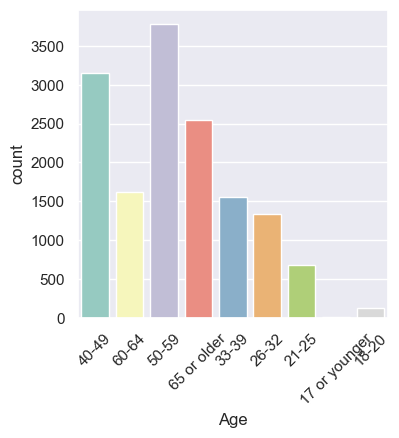

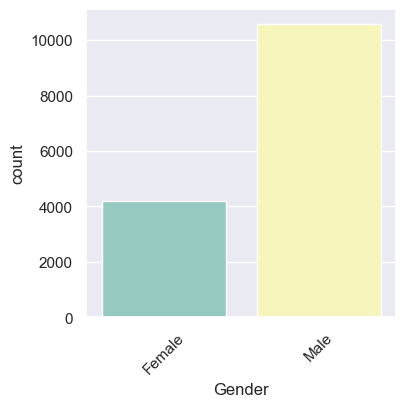

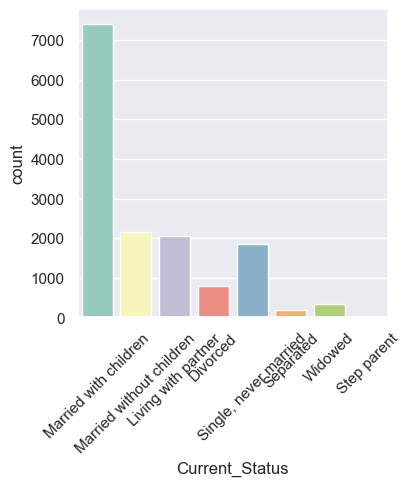

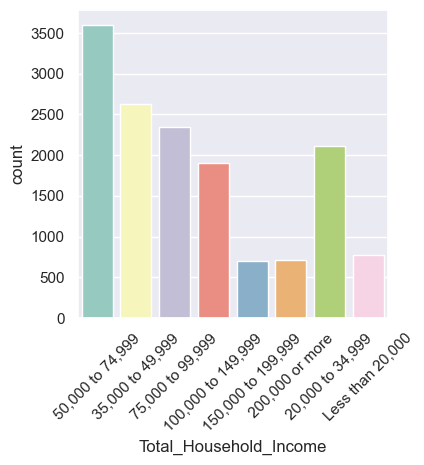

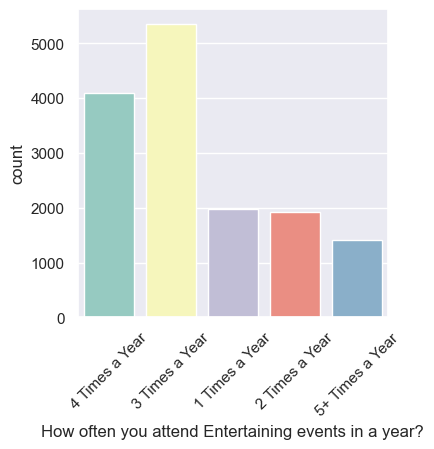

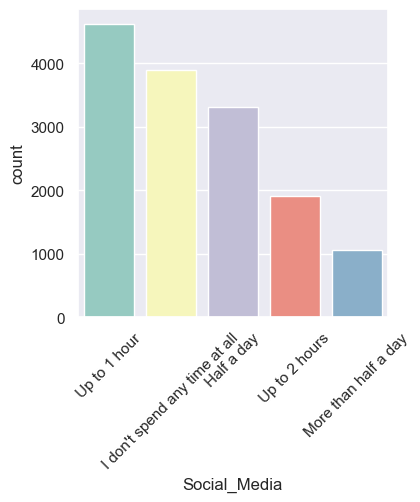

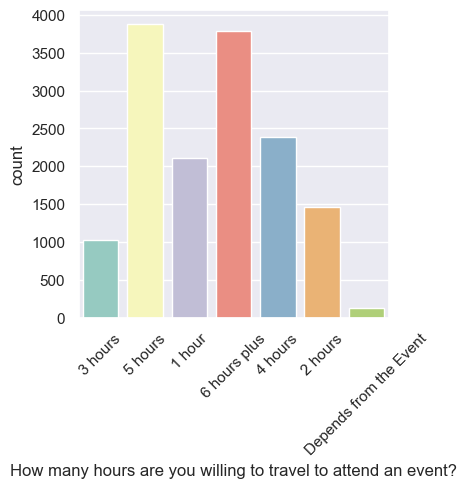

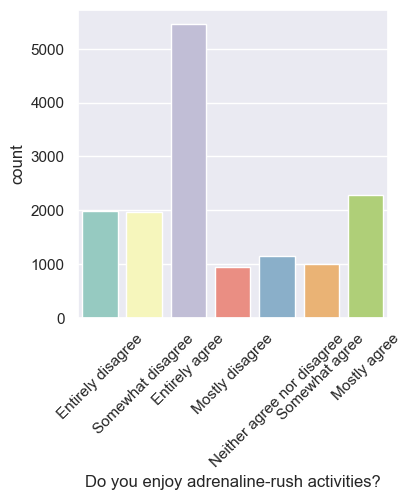

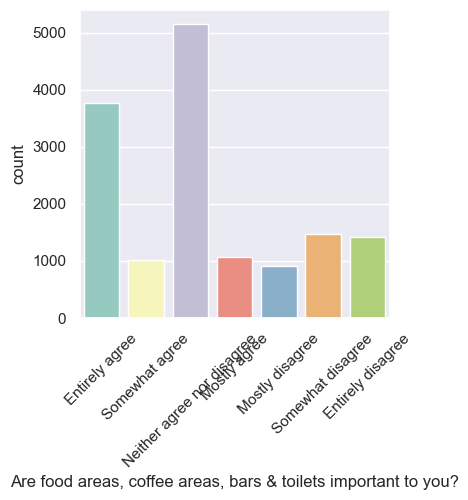

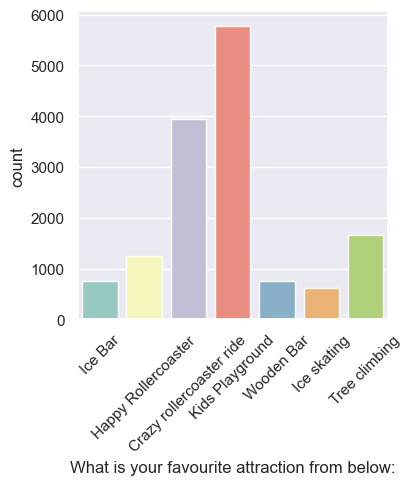

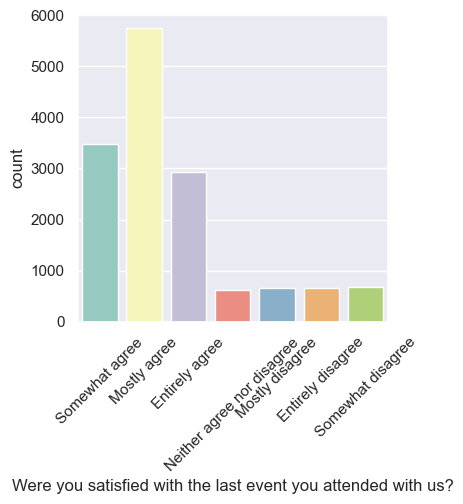

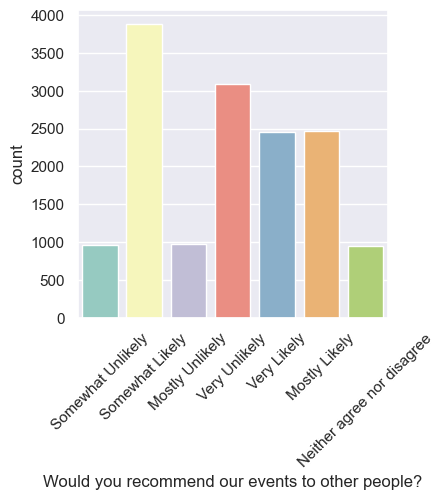

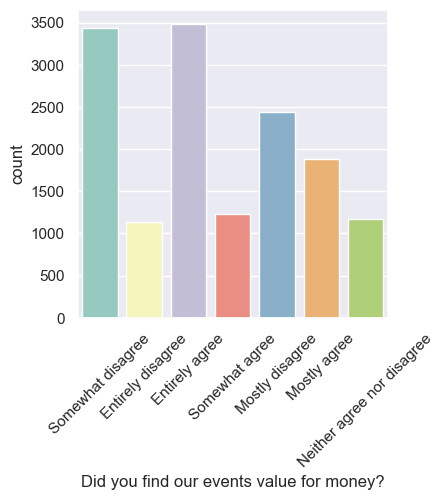

In [9]:
features = ['Age', 'Gender', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

sns.set(rc={'figure.figsize':(4,4)})

for f in features:
    sns.countplot(x = f, data = df, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()
    

### Calculating the Distance of each person from the event location

In [10]:
def haversine_vectorize(lon1, lat1, lon2, lat2):
 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
 
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [11]:
df['Event Lat'] = '51.5073'
df['Event Lon'] = '0.1657'


haversine_vectorize(df['Event Lon'].astype(float) ,df['Event Lat'].astype(float),df['longitude'].astype(float) ,
                   df['latitude'].astype(float))


df['Distance from Event'] = haversine_vectorize(df['Event Lon'].astype(float) ,df['Event Lat'].astype(float),df['longitude'].astype(float) ,
                   df['latitude'].astype(float))

In [12]:
df.head()

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,...,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?,Event Lat,Event Lon,Distance from Event
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",...,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree,51.5073,0.1657,34.342502
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",...,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree,51.5073,0.1657,41.376761
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",...,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree,51.5073,0.1657,701.484783
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",...,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree,51.5073,0.1657,176.943287
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",...,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree,51.5073,0.1657,17.216110


In [13]:
raw_data = df[features]
print(raw_data.shape)

new_raw_data = pd.get_dummies(raw_data, columns = features)

print(new_raw_data.shape)
new_raw_data.head()

(14778, 13)
(14778, 86)


,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


### Number of features increased from 13 to 86

### Calculating inertia of k-means with 5 clusters

In [14]:
X_train = new_raw_data.values

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [0 4 4 ... 0 1 4]
The Inertia is:  101900.26594116421


### Checking Inertia for multiple clusters

In [15]:
no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f, "Clusters is:", u)

The inertia for : 2 Clusters is: 125619.02972065727
The inertia for : 3 Clusters is: 114905.38684266702
The inertia for : 4 Clusters is: 106337.17594801627
The inertia for : 5 Clusters is: 100865.16529237546
The inertia for : 6 Clusters is: 96432.53526396505
The inertia for : 7 Clusters is: 93814.4989763171
The inertia for : 8 Clusters is: 91696.57513876252
The inertia for : 9 Clusters is: 89725.00222083348
The inertia for : 10 Clusters is: 88493.22915979216
The inertia for : 11 Clusters is: 87581.06059954726
The inertia for : 12 Clusters is: 86617.6660888009
The inertia for : 13 Clusters is: 85829.38420440158
The inertia for : 14 Clusters is: 85014.85271668163
The inertia for : 15 Clusters is: 84434.74381493333
The inertia for : 16 Clusters is: 83662.83564950572
The inertia for : 17 Clusters is: 82854.33711923643
The inertia for : 18 Clusters is: 82485.74994726645
The inertia for : 19 Clusters is: 82187.93372039591


### Elbow graph

Text(0.5, 1.0, 'Inertia Plot per k')

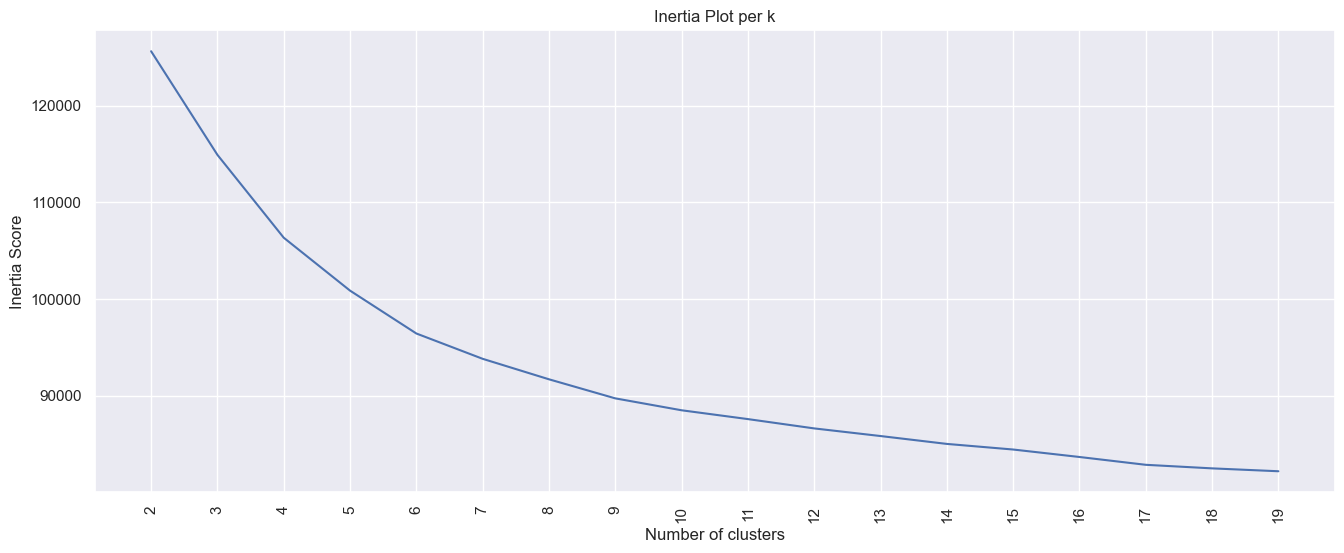

In [16]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

### Number of instances in each cluster of 5 clusters

In [17]:
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,2208,1226,8492,1865,987


## Now we have got 86 columns which is not feasible when then dataset becomes even bigger. So we will use `PCA` to decompose the dataset

## PCA

In [20]:
new_raw_data.shape

(14778, 86)

Explained variance ratio (first two components): [0.167356 0.078177]


<Figure size 800x600 with 0 Axes>

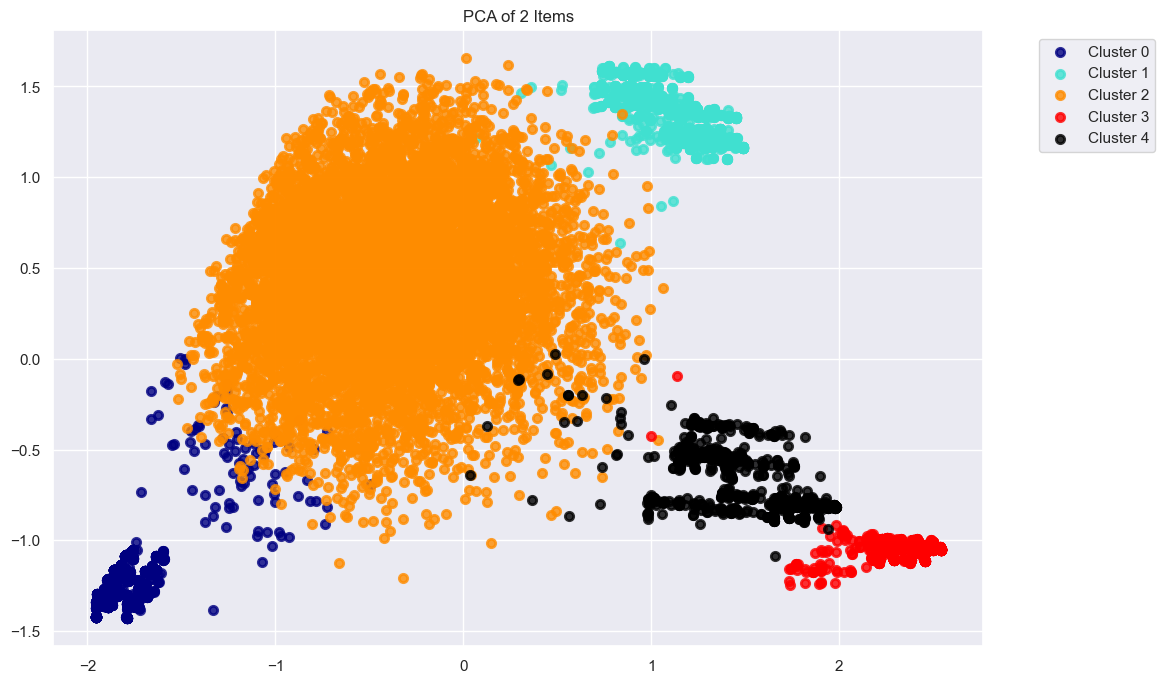

In [21]:
X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

Total Variance in our dataset is:  9.789277508428578
The 95% variance we want to have is:  9.29981363300715

Variance explain with 30 n_compononets:  7.800063287617351
Variance explain with 35 n_compononets:  8.200059944222126
Variance explain with 40 n_compononets:  8.559358189926291
Variance explain with 41 n_compononets:  8.625206072416157
Variance explain with 50 n_compononets:  9.1572220656012
Variance explain with 53 n_compononets:  9.301801997586802
Variance explain with 55 n_compononets:  9.39152819059344
Variance explain with 60 n_compononets:  9.592274980903573


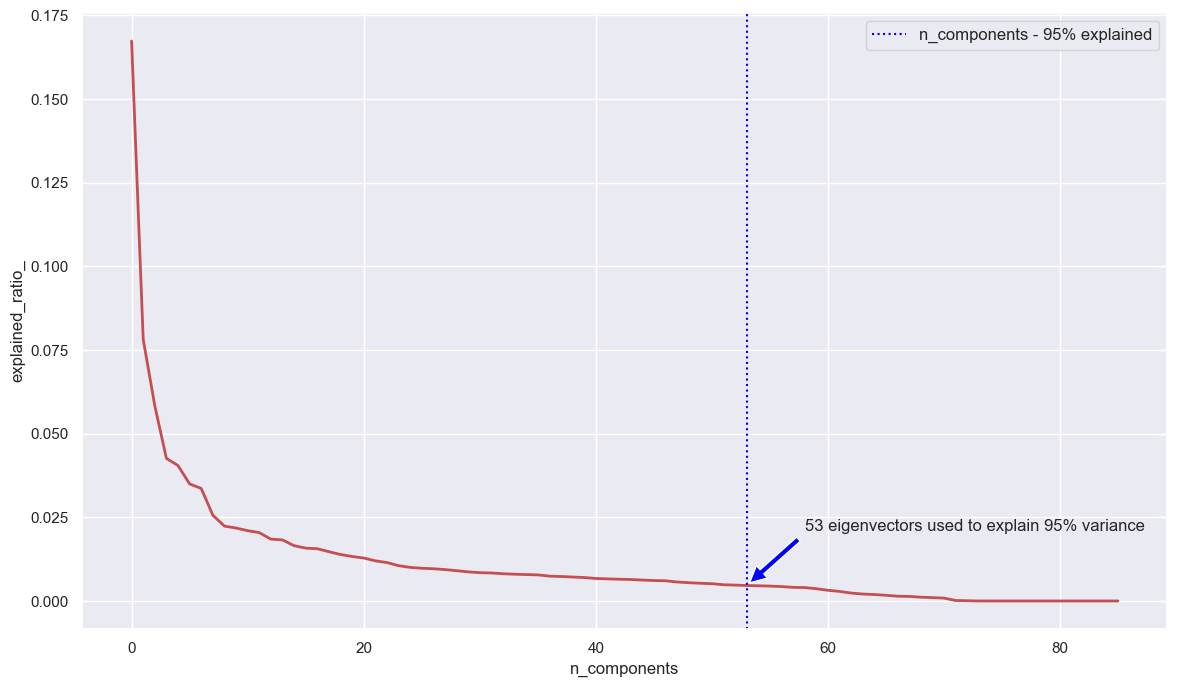

In [21]:
n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 53 n_compononets: ", sum(a["Explained Variance"][0:53]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))
print("Variance explain with 60 n_compononets: ", sum(a["Explained Variance"][0:60]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(53,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('53 eigenvectors used to explain 95% variance', xy=(53, pca.explained_variance_ratio_[53]), 
             xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

### Checking for inertia with different number of clusters and 53 reduced features using PCA

The inertia for : 2 Clusters is: 118418.00533439951
The inertia for : 3 Clusters is: 107706.73804798855
The inertia for : 4 Clusters is: 99150.89658689548
The inertia for : 5 Clusters is: 94717.71454592944
The inertia for : 6 Clusters is: 89259.98846975304
The inertia for : 7 Clusters is: 87032.31815907742
The inertia for : 8 Clusters is: 84734.2526517551
The inertia for : 9 Clusters is: 82901.4338942602
The inertia for : 10 Clusters is: 81675.79302907932
The inertia for : 11 Clusters is: 80363.07116110733
The inertia for : 12 Clusters is: 79645.57849749773
The inertia for : 13 Clusters is: 78836.55417592355
The inertia for : 14 Clusters is: 77765.06416907413
The inertia for : 15 Clusters is: 77471.39025517246
The inertia for : 16 Clusters is: 76646.93730762883
The inertia for : 17 Clusters is: 75782.7240216464
The inertia for : 18 Clusters is: 75256.9548384841
The inertia for : 19 Clusters is: 74707.75842734544


Text(0.5, 1.0, 'Inertia Plot per k')

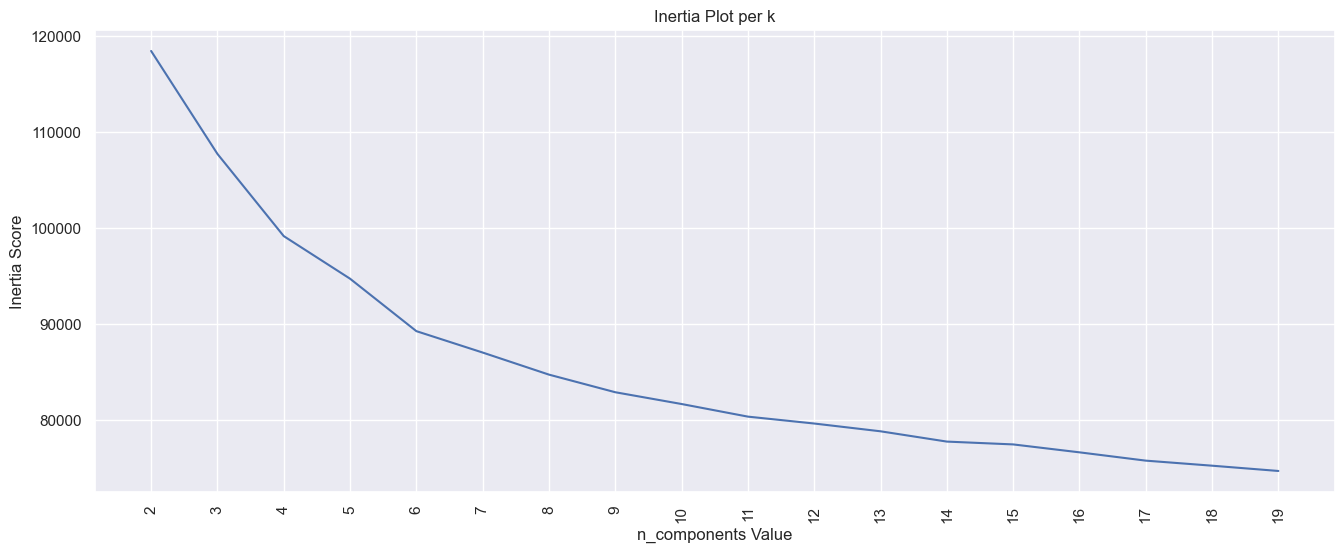

In [22]:
pca = PCA(n_components=53, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

## More optimization

In [23]:
new_raw_data.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How often you attend Entertaining events in a year?_1 Times a Year',
       'How often you attend Enterta

### Combining similar columns

In [24]:
print("The shape is: ", new_raw_data.shape)

# Cleaning the "how_often_you_attend_entertaining_events_in_a_year" column

# 1-2 times
new_raw_data['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'] = 0
new_raw_data['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][(new_raw_data['How often you attend Entertaining events in a year?_1 Times a Year'] == 1) |     (new_raw_data['How often you attend Entertaining events in a year?_2 Times a Year'] == 1)] = 1

# 4-5 times
new_raw_data['how_often_you_attend_entertaining_events_in_a_year_4_or_5_times'] = 0
new_raw_data['how_often_you_attend_entertaining_events_in_a_year_4_or_5_times'][(new_raw_data['How often you attend Entertaining events in a year?_4 Times a Year'] == 1) | (new_raw_data['How often you attend Entertaining events in a year?_5+ Times a Year'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "social_media" column

# half a day + more than half a day
new_raw_data['social_media_Half a day plus'] = 0
new_raw_data['social_media_Half a day plus'][(new_raw_data['Social_Media_Half a day'] == 1) | (new_raw_data['Social_Media_More than half a day'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "how_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour" column

# 1 to 2 hours
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'] = 0
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'][(new_raw_data['How many hours are you willing to travel to attend an event?_1 hour'] == 1) | (new_raw_data['How many hours are you willing to travel to attend an event?_2 hours'] == 1)] = 1

# 3 to 4 hours
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'] = 0
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'][(new_raw_data['How many hours are you willing to travel to attend an event?_3 hours'] == 1) | (new_raw_data['How many hours are you willing to travel to attend an event?_4 hours'] == 1)] = 1

# 5 to 6 hours
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'] = 0
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'][(new_raw_data['How many hours are you willing to travel to attend an event?_5 hours'] == 1) | (new_raw_data['How many hours are you willing to travel to attend an event?_6 hours plus'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "do_you_enjoy_adrenaline_rush_activities" column

# Mostly & Somewhat Agree
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'] = 0
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'][(new_raw_data['Do you enjoy adrenaline-rush activities?_Somewhat agree'] == 1) | (new_raw_data['Do you enjoy adrenaline-rush activities?_Mostly agree'] == 1)] = 1

# Mostly & Somewhat Disagree
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'] = 0
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'][(new_raw_data['Do you enjoy adrenaline-rush activities?_Mostly disagree'] == 1) | (new_raw_data['Do you enjoy adrenaline-rush activities?_Somewhat disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)

The shape is:  (14778, 86)
The shape is:  (14778, 88)
The shape is:  (14778, 89)
The shape is:  (14778, 92)
The shape is:  (14778, 94)


C:\Users\Siddarth\AppData\Local\Temp\ipykernel_30256\2428658810.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][(new_raw_data['How often you attend Entertaining events in a year?_1 Times a Year'] == 1) |     (new_raw_data['How often you attend Entertaining events in a year?_2 Times a Year'] == 1)] = 1
C:\Users\Siddarth\AppData\Local\Temp\ipykernel_30256\2428658810.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['how_often_you_attend_entertaining_events_in_a_year_4_or_5_times'][(new_raw_data['How often you attend Entert

In [25]:
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'] = 0
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'][(new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Mostly agree'] == 1) | (new_raw_data['Do you enjoy adrenaline-rush activities?_Somewhat agree'] == 1)] = 1


# Mostly & Somewhat & entirely Disagree
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'] = 0
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'][(new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Entirely disagree'] == 1) | (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Mostly disagree'] == 1) | (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Somewhat disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)



# Cleaning the "were_you_satisfied_with_the_last_event_you_attended_with_us" column

# Entirely & Mostly & Somewhat & Neither Disagree
new_raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'] = 0
new_raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'][(new_raw_data['Were you satisfied with the last event you attended with us?_Entirely disagree'] == 1) | (new_raw_data['Were you satisfied with the last event you attended with us?_Mostly disagree'] == 1) | (new_raw_data['Were you satisfied with the last event you attended with us?_Somewhat disagree'] == 1) | (new_raw_data['Were you satisfied with the last event you attended with us?_Neither agree nor disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "would_you_recommend_our_events_to_other_people" column

# Mostly & Somewhat & Neither Unlikely
new_raw_data['would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'] = 0
new_raw_data['would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'][(new_raw_data['Would you recommend our events to other people?_Mostly Unlikely'] == 1) | (new_raw_data['Would you recommend our events to other people?_Somewhat Unlikely'] == 1) | (new_raw_data['Would you recommend our events to other people?_Neither agree nor disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "did_you_find_our_events_value_for_money" column

# Mostly & Somewhat agree
new_raw_data['did_you_find_our_events_value_for_money Mostly & Somewhat agree'] = 0
new_raw_data['did_you_find_our_events_value_for_money Mostly & Somewhat agree'][(new_raw_data['Did you find our events value for money?_Somewhat agree'] == 1) | (new_raw_data['Did you find our events value for money?_Mostly agree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)

The shape is:  (14778, 96)
The shape is:  (14778, 97)
The shape is:  (14778, 98)
The shape is:  (14778, 99)


C:\Users\Siddarth\AppData\Local\Temp\ipykernel_30256\1998523636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'][(new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Mostly agree'] == 1) | (new_raw_data['Do you enjoy adrenaline-rush activities?_Somewhat agree'] == 1)] = 1
C:\Users\Siddarth\AppData\Local\Temp\ipykernel_30256\1998523636.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree

### Removing the old features by keeping only the newly combined features

In [26]:
# Replacing apostrophe from columns names
new_raw_data.columns = new_raw_data.columns.str.replace("'","")

# Excluding the fields we have merged together
new_features = [
    'Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
    'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
    'Gender_Female', 'Gender_Male',
    'Current_Status_Divorced',
    'Current_Status_Living with partner',
    'Current_Status_Married with children',
    'Current_Status_Married without children',
    'Current_Status_Separated',
    'Current_Status_Single, never married',
    'Current_Status_Step parent',
    'Current_Status_Widowed',
    'Total_Household_Income_100,000 to 149,999',
    'Total_Household_Income_150,000 to 199,999',
    'Total_Household_Income_20,000 to 34,999',
    'Total_Household_Income_200,000 or more',
    'Total_Household_Income_35,000 to 49,999',
    'Total_Household_Income_50,000 to 74,999',
    'Total_Household_Income_75,000 to 99,999',
    'Total_Household_Income_Less than 20,000',
#        'How often you attend Entertaining events in a year?_1 Times a Year',
#        'How often you attend Entertaining events in a year?_2 Times a Year',
    'How often you attend Entertaining events in a year?_3 Times a Year',
#        'How often you attend Entertaining events in a year?_4 Times a Year',
#        'How often you attend Entertaining events in a year?_5+ Times a Year',
#        'Social_Media_Half a day',
    "Social_Media_I dont spend any time at all",
#        'Social_Media_More than half a day',
    'Social_Media_Up to 1 hour',
    'Social_Media_Up to 2 hours',
#        'How many hours are you willing to travel to attend an event?_1 hour',
#        'How many hours are you willing to travel to attend an event?_2 hours',
#        'How many hours are you willing to travel to attend an event?_3 hours',
#        'How many hours are you willing to travel to attend an event?_4 hours',
#        'How many hours are you willing to travel to attend an event?_5 hours',
#        'How many hours are you willing to travel to attend an event?_6 hours plus',
    'How many hours are you willing to travel to attend an event?_Depends from the Event',
    'Do you enjoy adrenaline-rush activities?_Entirely agree',
    'Do you enjoy adrenaline-rush activities?_Entirely disagree',
#        'Do you enjoy adrenaline-rush activities?_Mostly agree',
#        'Do you enjoy adrenaline-rush activities?_Mostly disagree',
    'Do you enjoy adrenaline-rush activities?_Neither agree nor disagree',
#        'Do you enjoy adrenaline-rush activities?_Somewhat agree',
#        'Do you enjoy adrenaline-rush activities?_Somewhat disagree',
    'Are food areas, coffee areas, bars & toilets important to you?_Entirely agree',
#        'Are food areas, coffee areas, bars & toilets important to you?_Entirely disagree',
#        'Are food areas, coffee areas, bars & toilets important to you?_Mostly agree',
#        'Are food areas, coffee areas, bars & toilets important to you?_Mostly disagree',
    'Are food areas, coffee areas, bars & toilets important to you?_Neither agree nor disagree',
#        'Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree',
#        'Are food areas, coffee areas, bars & toilets important to you?_Somewhat disagree',
    'What is your favourite attraction from below:_Crazy rollercoaster ride',
    'What is your favourite attraction from below:_Happy Rollercoaster',
    'What is your favourite attraction from below:_Ice Bar',
    'What is your favourite attraction from below:_Ice skating',
    'What is your favourite attraction from below:_Kids Playground',
    'What is your favourite attraction from below:_Tree climbing',
    'What is your favourite attraction from below:_Wooden Bar',
    'Were you satisfied with the last event you attended with us?_Entirely agree',
#        'Were you satisfied with the last event you attended with us?_Entirely disagree',
    'Were you satisfied with the last event you attended with us?_Mostly agree',
#        'Were you satisfied with the last event you attended with us?_Mostly disagree',
    'Were you satisfied with the last event you attended with us?_Neither agree nor disagree',
#        'Were you satisfied with the last event you attended with us?_Somewhat agree',
#        'Were you satisfied with the last event you attended with us?_Somewhat disagree',
    'Would you recommend our events to other people?_Mostly Likely',
#        'Would you recommend our events to other people?_Mostly Unlikely',
#        'Would you recommend our events to other people?_Neither agree nor disagree',
    'Would you recommend our events to other people?_Somewhat Likely',
#        'Would you recommend our events to other people?_Somewhat Unlikely',
    'Would you recommend our events to other people?_Very Likely',
    'Would you recommend our events to other people?_Very Unlikely',
    'Did you find our events value for money?_Entirely agree',
    'Did you find our events value for money?_Entirely disagree',
#        'Did you find our events value for money?_Mostly agree',
    'Did you find our events value for money?_Mostly disagree',
    'Did you find our events value for money?_Neither agree nor disagree',
#        'Did you find our events value for money?_Somewhat agree',
    'Did you find our events value for money?_Somewhat disagree',
    
    'how_often_you_attend_entertaining_events_in_a_year_1_or_2_times',
    'how_often_you_attend_entertaining_events_in_a_year_4_or_5_times',           
    'social_media_Half a day plus',        
    'how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours',
    'how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours',
    'how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours',            
    'do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree',
    'do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree',          
    'are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree',
    'are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree',            
    'were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree',            
    'would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely',            
    'did_you_find_our_events_value_for_money Mostly & Somewhat agree'
]

### Running `k-means` for different number of clusters to check for inertia and with combined features

The inertia for : 2 Clusters is: 115967.22473789981
The inertia for : 3 Clusters is: 103525.0200894443
The inertia for : 4 Clusters is: 96283.6614377111
The inertia for : 5 Clusters is: 91283.0888542649
The inertia for : 6 Clusters is: 89006.14637091351
The inertia for : 7 Clusters is: 86923.4795298724
The inertia for : 8 Clusters is: 85223.235760864
The inertia for : 9 Clusters is: 83328.79042621612
The inertia for : 10 Clusters is: 81977.71223889732
The inertia for : 11 Clusters is: 80875.66254999118
The inertia for : 12 Clusters is: 79900.03683111651
The inertia for : 13 Clusters is: 79247.92922720154
The inertia for : 14 Clusters is: 78158.62865141194
The inertia for : 15 Clusters is: 77391.66358767451
The inertia for : 16 Clusters is: 76674.74057487864
The inertia for : 17 Clusters is: 75950.8833192137
The inertia for : 18 Clusters is: 75485.30729648881
The inertia for : 19 Clusters is: 74920.57744609601
The inertia for : 20 Clusters is: 74163.4161789865


Text(0.5, 1.0, 'Inertia Plot per k')

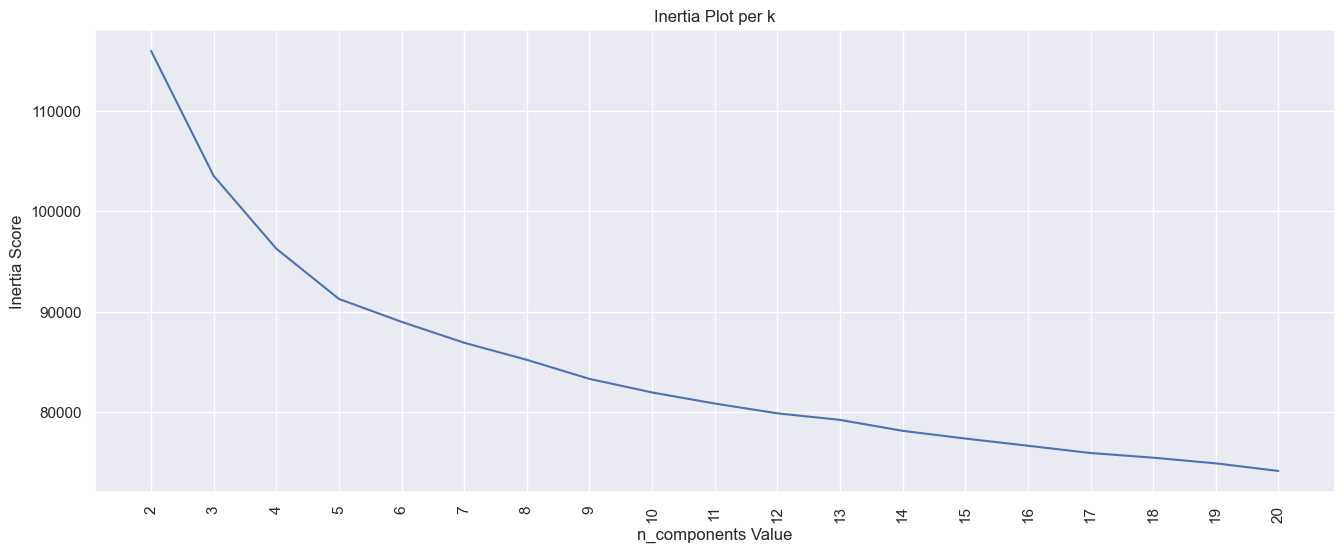

In [27]:
# Re - Running Kmeans on "new" data

X_train = new_raw_data[new_features].values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f, "Clusters is:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

Explained variance ratio (first two components): [0.184374 0.094741]


<Figure size 400x400 with 0 Axes>

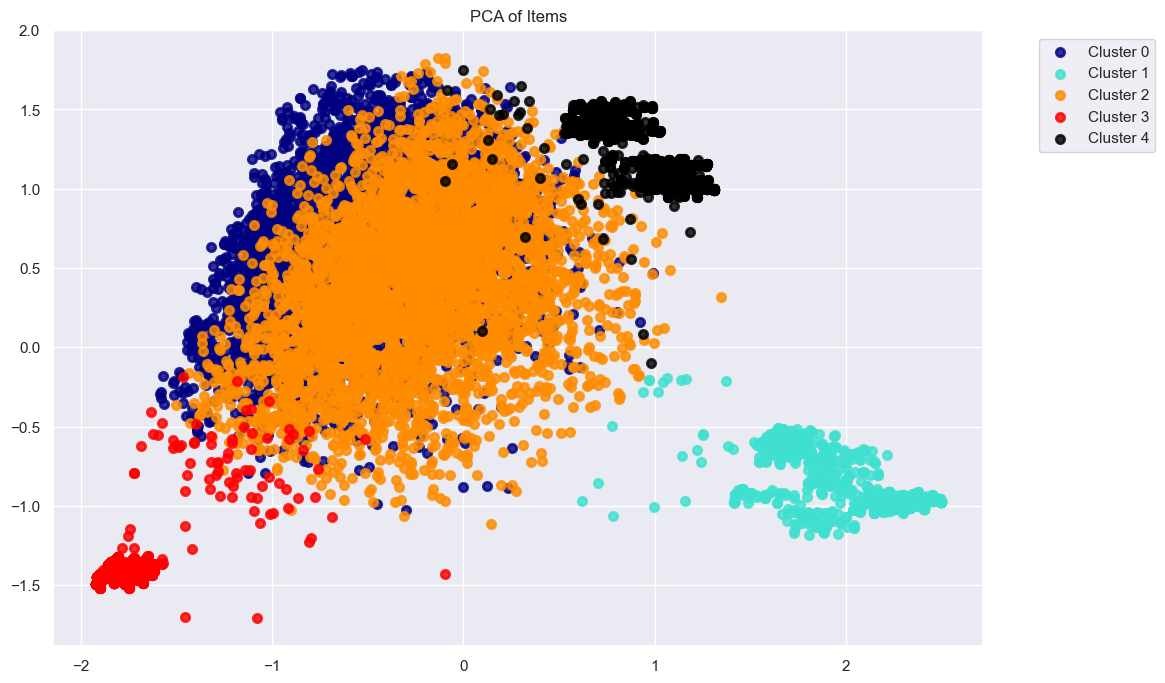

In [28]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
new_raw_data.to_csv('./Dataset/New_raw_data.csv')

### Still there is some overlapping among the features. So we will again use `PCA` to decompose the data to keep upto `95%` of the total variance

Total Variance in our dataset is:  9.180531774162311
The 95% variance we want to have is:  8.721505185454195

Variance explain with 30 n_compononets:  8.014406502568583
Variance explain with 35 n_compononets:  8.396329813160833
Variance explain with 36 n_compononets:  8.461635629287185
Variance explain with 40 n_compononets:  8.7003816381161
Variance explain with 41 n_compononets:  8.751274630760921
Variance explain with 50 n_compononets:  9.095245791501771


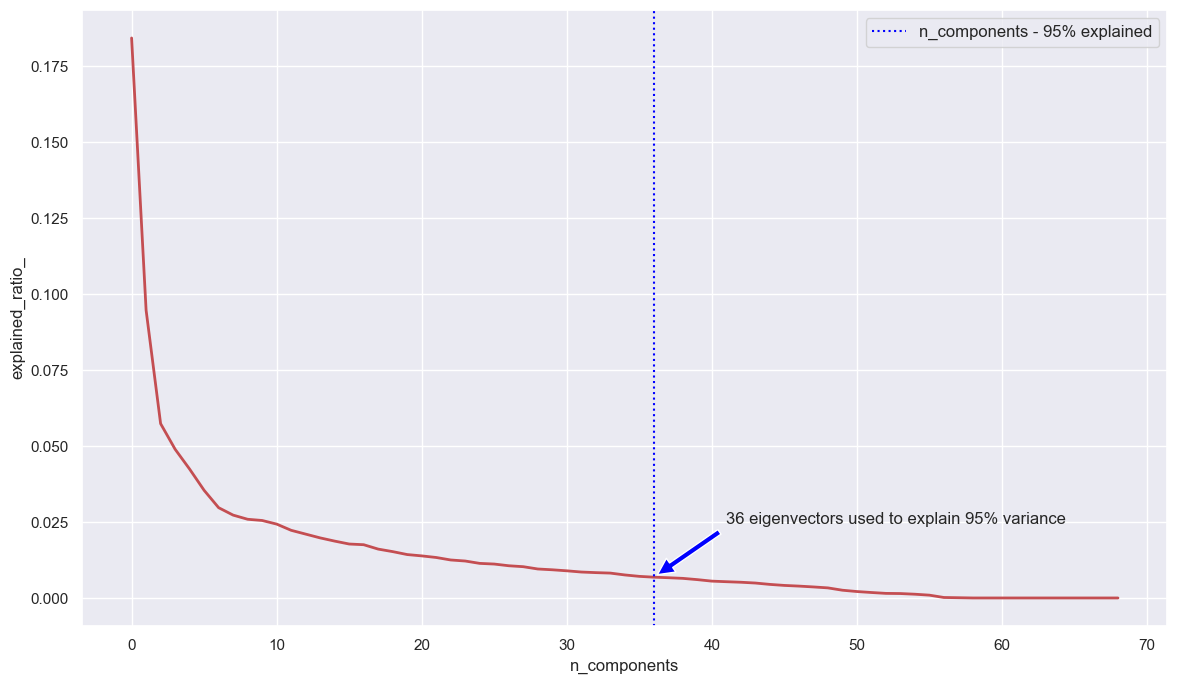

In [28]:
n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 36 n_compononets: ", sum(a["Explained Variance"][0:36]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(36,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('36 eigenvectors used to explain 95% variance', xy=(36, pca.explained_variance_ratio_[36]), xytext=(41, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

### Running `K-means` for different number of clusters to check for inertia with 36 features

The inertia for : 2 Clusters is: 105238.43299446018
The inertia for : 3 Clusters is: 92911.46030532804
The inertia for : 4 Clusters is: 85693.70472771939
The inertia for : 5 Clusters is: 80703.38891729043
The inertia for : 6 Clusters is: 78454.8178005808
The inertia for : 7 Clusters is: 76375.07916565801
The inertia for : 8 Clusters is: 74776.12378369166
The inertia for : 9 Clusters is: 72886.30338685188
The inertia for : 10 Clusters is: 71630.15404372885
The inertia for : 11 Clusters is: 70619.7808073067
The inertia for : 12 Clusters is: 69346.65797379437
The inertia for : 13 Clusters is: 68735.61953260798
The inertia for : 14 Clusters is: 67708.56865301062
The inertia for : 15 Clusters is: 66931.86574392965
The inertia for : 16 Clusters is: 66238.52071892508
The inertia for : 17 Clusters is: 65647.88198639416
The inertia for : 18 Clusters is: 65232.472137144294
The inertia for : 19 Clusters is: 64482.44337332091
The inertia for : 20 Clusters is: 64072.60290522323


Text(0.5, 1.0, 'Inertia Plot per k')

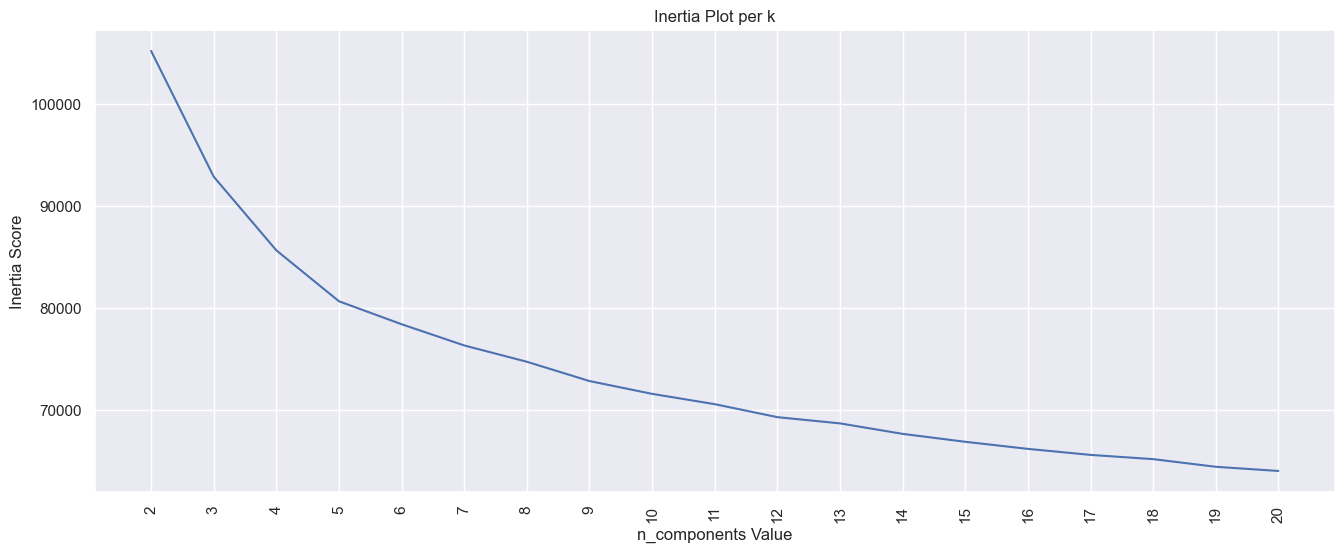

In [29]:
pca = PCA(n_components=36, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

### Choosing 5 clusters

In [30]:
pca = PCA(n_components=36, random_state = 453)
X_r = pca.fit(X).transform(X)

# Running Kmeans with 5 Ks
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_r)

clusters = kmeans.labels_

# Attachine the clusters back to our initial Dataset that has all the data
df['Clusters'] = clusters

# Creating a cluster Category
df['Clusters Category'] = 'No Data'
df['Clusters Category'].loc[df['Clusters'] == 0] = 'Cluster 1'
df['Clusters Category'].loc[df['Clusters'] == 1] = 'Cluster 2'
df['Clusters Category'].loc[df['Clusters'] == 2] = 'Cluster 3'
df['Clusters Category'].loc[df['Clusters'] == 3] = 'Cluster 4'
df['Clusters Category'].loc[df['Clusters'] == 4] = 'Cluster 5'

df.head(5)

C:\Users\Siddarth\AppData\Local\Temp\ipykernel_32872\3346571529.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clusters Category'].loc[df['Clusters'] == 0] = 'Cluster 1'
C:\Users\Siddarth\AppData\Local\Temp\ipykernel_32872\3346571529.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clusters Category'].loc[df['Clusters'] == 1] = 'Cluster 2'
C:\Users\Siddarth\AppData\Local\Temp\ipykernel_32872\3346571529.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,...,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?,Event Lat,Event Lon,Distance from Event,Clusters,Clusters Category
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",...,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree,51.5073,0.1657,34.342502,4,Cluster 5
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",...,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree,51.5073,0.1657,41.376761,3,Cluster 4
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",...,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree,51.5073,0.1657,701.484783,3,Cluster 4
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",...,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree,51.5073,0.1657,176.943287,1,Cluster 2
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",...,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree,51.5073,0.1657,17.216110,0,Cluster 1


In [31]:
df.columns

Index(['CUSTOMER', 'Age', 'Gender', 'Postcode', 'District', 'Constituency',
       'latitude', 'longitude', 'Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?', 'Event Lat', 'Event Lon',
       'Distance from Event', 'Clusters', 'Clusters Category'],
      dtype='object')

## Adding some additional fields for `Data Analysis`

In [ ]:
# Creating an order for Household Income

df['Household Income Order'] = 0
df['Household Income Order'].loc[df['Total_Household_Income'] == 'Less than 20,000'] = 1
df['Household Income Order'].loc[df['Total_Household_Income'] == '20,000 to 34,999'] = 2
df['Household Income Order'].loc[df['Total_Household_Income'] == '35,000 to 49,999'] = 3
df['Household Income Order'].loc[df['Total_Household_Income'] == '50,000 to 74,999'] = 4
df['Household Income Order'].loc[df['Total_Household_Income'] == '75,000 to 99,999'] = 5
df['Household Income Order'].loc[df['Total_Household_Income'] == '100,000 to 149,999'] = 6
df['Household Income Order'].loc[df['Total_Household_Income'] == '150,000 to 199,999'] = 7
df['Household Income Order'].loc[df['Total_Household_Income'] == '200,000 or more'] = 8

# Replacing apostrophe from columns names
df['Social_Media'] = df['Social_Media'].str.replace("'","")

# Creating an order for Social Media Time Spend
df['Social Media Time Spend Order'] = 0
df['Social Media Time Spend Order'].loc[df['Social_Media'] == 'I dont spend any time at all'] = 1
df['Social Media Time Spend Order'].loc[df['Social_Media'] == 'Up to 1 hour'] = 2
df['Social Media Time Spend Order'].loc[df['Social_Media'] == 'Up to 2 hours'] = 3
df['Social Media Time Spend Order'].loc[df['Social_Media'] == 'Half a day'] = 4
df['Social Media Time Spend Order'].loc[df['Social_Media'] == 'More than half a day'] = 5

# Creating an order for food_areas_coffee_areas_bars_toilets that have Entirely Agree, etc..
df['food_areas_coffee_areas_bars_toilets Agree Order'] = 0
df['food_areas_coffee_areas_bars_toilets Agree Order'].loc[df['Are food areas, coffee areas, bars & toilets important to you?'] == 'Entirely agree'] = 1
df['food_areas_coffee_areas_bars_toilets Agree Order'].loc[df['Are food areas, coffee areas, bars & toilets important to you?'] == 'Mostly agree'] = 2
df['food_areas_coffee_areas_bars_toilets Agree Order'].loc[df['Are food areas, coffee areas, bars & toilets important to you?'] == 'Somewhat agree'] = 3
df['food_areas_coffee_areas_bars_toilets Agree Order'].loc[df['Are food areas, coffee areas, bars & toilets important to you?'] == 'Neither agree nor disagree'] = 4
df['food_areas_coffee_areas_bars_toilets Agree Order'].loc[df['Are food areas, coffee areas, bars & toilets important to you?'] == 'Somewhat disagree'] = 5
df['food_areas_coffee_areas_bars_toilets Agree Order'].loc[df['Are food areas, coffee areas, bars & toilets important to you?'] == 'Mostly disagree'] = 6
df['food_areas_coffee_areas_bars_toilets Agree Order'].loc[df['Are food areas, coffee areas, bars & toilets important to you?'] == 'Entirely disagree'] = 7

# Creating an order for do_you_enjoy_adrenaline_rush_activities
df['enjoy_adrenaline_rush_activities Agree Order'] = 0
df['enjoy_adrenaline_rush_activities Agree Order'].loc[df['Do you enjoy adrenaline-rush activities?'] == 'Entirely agree'] = 1
df['enjoy_adrenaline_rush_activities Agree Order'].loc[df['Do you enjoy adrenaline-rush activities?'] == 'Mostly agree'] = 2
df['enjoy_adrenaline_rush_activities Agree Order'].loc[df['Do you enjoy adrenaline-rush activities?'] == 'Somewhat agree'] = 3
df['enjoy_adrenaline_rush_activities Agree Order'].loc[df['Do you enjoy adrenaline-rush activities?'] == 'Neither agree nor disagree'] = 4
df['enjoy_adrenaline_rush_activities Agree Order'].loc[df['Do you enjoy adrenaline-rush activities?'] == 'Somewhat disagree'] = 5
df['enjoy_adrenaline_rush_activities Agree Order'].loc[df['Do you enjoy adrenaline-rush activities?'] == 'Mostly disagree'] = 6
df['enjoy_adrenaline_rush_activities Agree Order'].loc[df['Do you enjoy adrenaline-rush activities?'] == 'Entirely disagree'] = 7

# Creating an order for were_you_satisfied_with_the_last_event_you_attended_with_us
df['Satisfied Agree Order'] = 0
df['Satisfied Agree Order'].loc[df['Were you satisfied with the last event you attended with us?'] == 'Entirely agree'] = 1
df['Satisfied Agree Order'].loc[df['Were you satisfied with the last event you attended with us?'] == 'Mostly agree'] = 2
df['Satisfied Agree Order'].loc[df['Were you satisfied with the last event you attended with us?'] == 'Somewhat agree'] = 3
df['Satisfied Agree Order'].loc[df['Were you satisfied with the last event you attended with us?'] == 'Neither agree nor disagree'] = 4
df['Satisfied Agree Order'].loc[df['Were you satisfied with the last event you attended with us?'] == 'Somewhat disagree'] = 5
df['Satisfied Agree Order'].loc[df['Were you satisfied with the last event you attended with us?'] == 'Mostly disagree'] = 6
df['Satisfied Agree Order'].loc[df['Were you satisfied with the last event you attended with us?'] == 'Entirely disagree'] = 7

# Creating an order for did_you_find_our_events_value_for_money
df['Value_for_money Agree Order'] = 0
df['Value_for_money Agree Order'].loc[df['Did you find our events value for money?'] == 'Entirely agree'] = 1
df['Value_for_money Agree Order'].loc[df['Did you find our events value for money?'] == 'Mostly agree'] = 2
df['Value_for_money Agree Order'].loc[df['Did you find our events value for money?'] == 'Somewhat agree'] = 3
df['Value_for_money Agree Order'].loc[df['Did you find our events value for money?'] == 'Neither agree nor disagree'] = 4
df['Value_for_money Agree Order'].loc[df['Did you find our events value for money?'] == 'Somewhat disagree'] = 5
df['Value_for_money Agree Order'].loc[df['Did you find our events value for money?'] == 'Mostly disagree'] = 6
df['Value_for_money Agree Order'].loc[df['Did you find our events value for money?'] == 'Entirely disagree'] = 7


# Creating an order for would_you_recommend_our_events_to_other_people
df['Recommend Order'] = 0
df['Recommend Order'].loc[df['Would you recommend our events to other people?'] == 'Very Likely'] = 1
df['Recommend Order'].loc[df['Would you recommend our events to other people?'] == 'Mostly Likely'] = 2
df['Recommend Order'].loc[df['Would you recommend our events to other people?'] == 'Somewhat Likely'] = 3
df['Recommend Order'].loc[df['Would you recommend our events to other people?'] == 'Neither agree nor disagree'] = 4
df['Recommend Order'].loc[df['Would you recommend our events to other people?'] == 'Somewhat Unlikely'] = 5
df['Recommend Order'].loc[df['Would you recommend our events to other people?'] == 'Mostly Unlikely'] = 6
df['Recommend Order'].loc[df['Would you recommend our events to other people?'] == 'Very Unlikely'] = 7

In [33]:
df.head()

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,...,Distance from Event,Clusters,Clusters Category,Household Income Order,Social Media Time Spend Order,food_areas_coffee_areas_bars_toilets Agree Order,enjoy_adrenaline_rush_activities Agree Order,Satisfied Agree Order,Value_for_money Agree Order,Recommend Order
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",...,34.342502,4,Cluster 5,4,2,1,7,3,5,5
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",...,41.376761,3,Cluster 4,3,2,1,5,2,7,3
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",...,701.484783,3,Cluster 4,5,1,3,5,2,7,6
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",...,176.943287,1,Cluster 2,3,4,4,1,3,5,3
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",...,17.216110,0,Cluster 1,6,2,4,6,1,1,7


## Exporting the final dataset

In [34]:
df.to_csv('./Dataset/Events_Data.csv')